In [128]:
import prepare as p
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

import itertools



Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)


Use the titanic data

In [106]:
titanic = p.prep_titanic()
print(titanic.shape)
print(titanic['survived'].mean())
titanic.head(3)

(891, 15)
0.3838383838383838


,passenger_id,survived,sex,age,sibsp,parch,fare,class,embark_town,alone,embark_town_queenstown,embark_town_southampton,class_second,class_third,sex_male
0,0,0,male,22.0,1,0,7.2500,Third,Southampton,0,0,1,0,1,1
1,1,1,female,38.0,1,0,71.2833,First,Cherbourg,0,0,0,0,0,0
2,2,1,female,26.0,0,0,7.9250,Third,Southampton,1,0,1,0,1,0


Split data 70/20/10

In [6]:
train, validate, test = p.split_data(df=titanic, test_size=.1, validate_size=.2, 
                                     stratify_col='survived', random_state=25)
print(len(train), len(validate), len(test))
print(train['survived'].mean(), validate['survived'].mean(), test['survived'].mean())

623 178 90
0.38362760834670945 0.38202247191011235 0.3888888888888889


split X features and y targey

In [7]:
def x_y_split(data_set, target, features):
    X = data_set[features]
    y = data_set[target]
    return X, y

Get desired columns

In [19]:
titanic.columns

Index(['passenger_id', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'class', 'embark_town', 'alone', 'embark_town_queenstown',
       'embark_town_southampton', 'class_second', 'class_third', 'sex_male'],
      dtype='object')

In [69]:
features = ['sibsp', 'parch', 'fare', 'alone', 'embark_town_queenstown', 
            'embark_town_southampton', 'class_second', 'class_third', 'sex_male']

X_train, y_train = x_y_split(data_set=train, target='survived', features=features)

X_validate, y_validate = x_y_split(data_set=validate, target='survived', features=features)

X_test, y_test = x_y_split(data_set=test, target='survived', features=features)

# verify
print(len(X_train),len(X_validate),len(X_test))

623 178 90


run baseline model

In [30]:
def run_baseline_model(train, validate, target):

    # create baseline model
    baseline_pred = y_train.mode()
    y_train_pred = pd.Series((baseline_pred[0]), range(len(y_train)))
    y_val_pred = pd.Series((baseline_pred[0]), range(len(y_validate)))

    scores = []

    output = {
    'features': features,
    'model': 'baseline',
    'train_accuracy': metrics.accuracy_score(y_train, y_train_pred),
    'train_precision': metrics.precision_score(y_train, y_train_pred),
    'train_recall/TPR': metrics.recall_score(y_train, y_train_pred),
    'train_f1': metrics.f1_score(y_train, y_train_pred),
    'validate_accuracy':  metrics.accuracy_score(y_validate, y_val_pred),
    'validate_precision': metrics.precision_score(y_validate, y_val_pred),
    'validate_recall/TPR': metrics.recall_score(y_validate, y_val_pred),
    'validate_f1': metrics.f1_score(y_validate, y_val_pred),
    }
    scores.append(output)
    
    scores_df = pd.DataFrame(scores)
    
    return scores_df

In [31]:
display(run_baseline_model(train, validate, 'survived'))

/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,features,model,train_accuracy,train_precision,train_recall/TPR,train_f1,validate_accuracy,validate_precision,validate_recall/TPR,validate_f1
0,"[sibsp, parch, fare, alone, embark_town_queens...",baseline,0.616372,0.0,0.0,0.0,0.617978,0.0,0.0,0.0


**1.**
- **What is your baseline prediction?** 0, did not survive
- **What is your baseline accuracy?** 61.2%

**2.**

- **Fit the decision tree classifier to your training sample and transform (make predictions)**

Make model

In [62]:
clf = DecisionTreeClassifier(max_depth=7, random_state=123)

Fit model

In [63]:
clf.fit(X_train, y_train)

make predicctions

In [64]:
y_pred_train = clf.predict(X_train)
y_pred_val = clf.predict(X_validate)

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [65]:
print(f'Model score on training set: {clf.score(X_train, y_train)}')
print(f'Confusion Matrix on training set:\n {metrics.confusion_matrix(y_train, y_pred_train)}')
print(f'Classification Report on training set:\n {metrics.classification_report(y_train, y_pred_train)}')

Model score on training set: 0.8828250401284109
Confusion Matrix on training set:
 [[378   6]
 [ 67 172]]
Classification Report on training set:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       384
           1       0.97      0.72      0.82       239

    accuracy                           0.88       623
   macro avg       0.91      0.85      0.87       623
weighted avg       0.89      0.88      0.88       623



In [66]:
print(f'Model score on validation set: {clf.score(X_validate, y_validate)}')
print(f'Confusion Matrix on validation set:\n {metrics.confusion_matrix(y_validate, y_pred_val)}')
print(f'Classification Report on validation set:\n {metrics.classification_report(y_validate, y_pred_val)}')

Model score on validation set: 0.7865168539325843
Confusion Matrix on validation set:
 [[100  10]
 [ 28  40]]
Classification Report on validation set:
               precision    recall  f1-score   support

           0       0.78      0.91      0.84       110
           1       0.80      0.59      0.68        68

    accuracy                           0.79       178
   macro avg       0.79      0.75      0.76       178
weighted avg       0.79      0.79      0.78       178



Plot tree

In [67]:
plt.figure(figsize=(13, 7), dpi=1000)
plot_tree(clf, feature_names=X_train.columns, rounded=True)

[Text(0.5316666666666666, 0.9375, 'sex_male <= 0.5\ngini = 0.473\nsamples = 623\nvalue = [384, 239]'),
 Text(0.25333333333333335, 0.8125, 'class_third <= 0.5\ngini = 0.367\nsamples = 219\nvalue = [53, 166]'),
 Text(0.10666666666666667, 0.6875, 'fare <= 28.856\ngini = 0.079\nsamples = 121\nvalue = [5, 116]'),
 Text(0.08, 0.5625, 'fare <= 28.231\ngini = 0.142\nsamples = 52\nvalue = [4, 48]'),
 Text(0.06666666666666667, 0.4375, 'sibsp <= 0.5\ngini = 0.111\nsamples = 51\nvalue = [3, 48]'),
 Text(0.04, 0.3125, 'fare <= 13.25\ngini = 0.057\nsamples = 34\nvalue = [1, 33]'),
 Text(0.02666666666666667, 0.1875, 'fare <= 12.675\ngini = 0.105\nsamples = 18\nvalue = [1, 17]'),
 Text(0.013333333333333334, 0.0625, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.04, 0.0625, 'gini = 0.18\nsamples = 10\nvalue = [1, 9]'),
 Text(0.05333333333333334, 0.1875, 'gini = 0.0\nsamples = 16\nvalue = [0, 16]'),
 Text(0.09333333333333334, 0.3125, 'fare <= 25.0\ngini = 0.208\nsamples = 17\nvalue = [2, 15]'),
 Te

Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

Run through steps 2-4 using a different `max_depth` value.



In [50]:
len(features)

9

In [55]:
scores = []

for m in range(2,len(features)+20):
    # Make KNN classifier 
    clf = DecisionTreeClassifier(max_depth=m, random_state=123)
    
    # Fit KNN classifier
    clf.fit(X_train, y_train)
    
    # Predict
    y_pred_train = clf.predict(X_train)
    y_pred_val = clf.predict(X_validate)
    
    output = {
        'model': f'DT: max_depth={m}',
        'train_accuracy': metrics.accuracy_score(y_train, y_pred_train),
        'train_precision': metrics.precision_score(y_train, y_pred_train),
        'train_recall/TPR': metrics.recall_score(y_train, y_pred_train),
        'train_f1': metrics.f1_score(y_train, y_pred_train),
        'validate_accuracy':  metrics.accuracy_score(y_validate, y_pred_val),
        'validate_precision': metrics.precision_score(y_validate, y_pred_val),
        'validate_recall/TPR': metrics.recall_score(y_validate, y_pred_val),
        'validate_f1': metrics.f1_score(y_validate, y_pred_val),
    }

    scores.append(output)
    

pd.DataFrame(scores)

,model,train_accuracy,train_precision,train_recall/TPR,train_f1,validate_accuracy,validate_precision,validate_recall/TPR,validate_f1
0,DT: max_depth=2,0.797753,0.757991,0.694561,0.724891,0.747191,0.676923,0.647059,0.661654
1,DT: max_depth=3,0.828250,0.907407,0.615063,0.733167,0.775281,0.804348,0.544118,0.649123
2,DT: max_depth=4,0.829856,0.913043,0.615063,0.735000,0.775281,0.804348,0.544118,0.649123
3,DT: max_depth=5,0.853933,0.925287,0.673640,0.779661,0.780899,0.784314,0.588235,0.672269
4,DT: max_depth=6,0.868379,0.943503,0.698745,0.802885,0.792135,0.803922,0.602941,0.689076
5,DT: max_depth=7,0.882825,0.966292,0.719665,0.824940,0.786517,0.800000,0.588235,0.677966
6,DT: max_depth=8,0.898876,0.963158,0.765690,0.853147,0.792135,0.792453,0.617647,0.694215
7,DT: max_depth=9,0.905297,0.973684,0.774059,0.862471,0.758427,0.711864,0.617647,0.661417
8,DT: max_depth=10,0.908507,0.978947,0.778243,0.867133,0.758427,0.711864,0.617647,0.661417
9,DT: max_depth=11,0.916533,0.979487,0.799163,0.880184,0.764045,0.716667,0.632353,0.671875


Which model performs better on your in-sample data?

Which model performs best on your out-of-sample data, the validate set?

In [100]:
strong_model_columns = ['class_second', 'class_third','sex_male','fare','alone','embark_town_southampton']
all_model_columns = ['fare', 'alone', 'embark_town_queenstown', 'embark_town_southampton',
                     'class_second', 'class_third', 'sex_male']

In [114]:
def run_decision_tree_model(train, validate, target, model_columns, random_state=None):   
    '''
    takes in train set, validate set, target, columns to model
    gets all column combinations and runs decision tree models for each combination
    scores for each model are stored in a DataFrame, scores_df
    
    Returns scores_df, a DataFrame of model scores
    '''
    # get column combinations
    column_combinations = []
    for k in range(1, len(model_columns)+1):
        for combo in list(itertools.combinations(model_columns, k)):
            column_combinations.append(list(combo))
    
    # for each combo of features
    for i, features in enumerate(column_combinations):
        
        # split X and y
        X_train, y_train = x_y_split(data_set=train, target=target, features=features)

        X_validate, y_validate = x_y_split(data_set=validate, target=target, features=features)
        
        scores = []
        
        # hyperparameter tuning
        for m in range(2, len(features)):
            # Make DT classifier 
            clf = DecisionTreeClassifier(max_depth=m, random_state=random_state, class_weight = {0: 0.61, 1: 0.39})

            # Fit DT classifier
            clf.fit(X_train, y_train)

            # Predict
            y_pred_train = clf.predict(X_train)
            y_pred_val = clf.predict(X_validate)

            output = {
                'features': features,
                'model': f'DT, max_depth={m}',
                'train_accuracy': metrics.accuracy_score(y_train, y_pred_train),
                'train_precision': metrics.precision_score(y_train, y_pred_train),
                'train_recall/TPR': metrics.recall_score(y_train, y_pred_train),
                'train_f1': metrics.f1_score(y_train, y_pred_train),
                'validate_accuracy':  metrics.accuracy_score(y_validate, y_pred_val),
                'validate_precision': metrics.precision_score(y_validate, y_pred_val),
                'validate_recall/TPR': metrics.recall_score(y_validate, y_pred_val),
                'validate_f1': metrics.f1_score(y_validate, y_pred_val),
            }
            scores.append(output)
            
        # initialize scores DataFrame for first iteration
        if i == 0:
            scores_df = pd.DataFrame(scores)
        # concat scores DataFrames for the rest of the iterations
        else:
            scores_df = pd.concat([scores_df, pd.DataFrame(scores)])
            
    return scores_df

In [115]:
scores_df = run_decision_tree_model(train, validate, 'survived', all_model_columns, random_state=20)

/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/anaconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: Undefi

In [116]:
scores_df.sort_values(by='validate_accuracy', ascending=False).head()

,features,model,train_accuracy,train_precision,train_recall/TPR,train_f1,validate_accuracy,validate_precision,validate_recall/TPR,validate_f1
3,"[fare, embark_town_queenstown, embark_town_sou...","DT, max_depth=5",0.845907,0.949686,0.631799,0.758794,0.797753,0.847826,0.573529,0.684211
4,"[fare, alone, embark_town_queenstown, embark_t...","DT, max_depth=6",0.860353,0.952381,0.669456,0.786241,0.792135,0.803922,0.602941,0.689076
3,"[fare, alone, embark_town_queenstown, embark_t...","DT, max_depth=5",0.849117,0.950311,0.640167,0.765000,0.786517,0.812500,0.573529,0.672414
3,"[fare, alone, embark_town_queenstown, embark_t...","DT, max_depth=5",0.849117,0.950311,0.640167,0.765000,0.786517,0.812500,0.573529,0.672414
3,"[fare, alone, embark_town_southampton, class_s...","DT, max_depth=5",0.849117,0.950311,0.640167,0.765000,0.786517,0.812500,0.573529,0.672414


In [117]:
best_models = scores_df.sort_values(by='validate_accuracy', ascending=False).head(2)
best_models

,features,model,train_accuracy,train_precision,train_recall/TPR,train_f1,validate_accuracy,validate_precision,validate_recall/TPR,validate_f1
3,"[fare, embark_town_queenstown, embark_town_sou...","DT, max_depth=5",0.845907,0.949686,0.631799,0.758794,0.797753,0.847826,0.573529,0.684211
4,"[fare, alone, embark_town_queenstown, embark_t...","DT, max_depth=6",0.860353,0.952381,0.669456,0.786241,0.792135,0.803922,0.602941,0.689076


In [118]:
for i in range(2):
    row = best_models.iloc[i]
    print(f'''features: {row['features']}, : model:{row['model']}, accuracy: {round(row['validate_accuracy'], 3)}''')

features: ['fare', 'embark_town_queenstown', 'embark_town_southampton', 'class_second', 'class_third', 'sex_male'], : model:DT, max_depth=5, accuracy: 0.798
features: ['fare', 'alone', 'embark_town_queenstown', 'embark_town_southampton', 'class_second', 'class_third', 'sex_male'], : model:DT, max_depth=6, accuracy: 0.792


Run best DT

In [122]:
features = ['fare', 'embark_town_queenstown', 'embark_town_southampton', 'class_second', 'class_third', 'sex_male']
max_depth = 5
target = 'survived'
random_state = 20

In [123]:
# split X and y

X_train, y_train = x_y_split(data_set=train, target=target, features=features)

X_validate, y_validate = x_y_split(data_set=validate, target=target, features=features)

In [126]:
clf = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state, class_weight = {0: 0.61, 1: 0.39})

# Fit DT classifier
clf.fit(X_train, y_train)

# Predict
y_pred_train = clf.predict(X_train)
y_pred_val = clf.predict(X_validate)

scores = []
output = {
    'features': features,
    'model': f'DT, max_depth={m}',
    'train_accuracy': metrics.accuracy_score(y_train, y_pred_train),
    'train_precision': metrics.precision_score(y_train, y_pred_train),
    'train_recall/TPR': metrics.recall_score(y_train, y_pred_train),
    'train_f1': metrics.f1_score(y_train, y_pred_train),
    'validate_accuracy':  metrics.accuracy_score(y_validate, y_pred_val),
    'validate_precision': metrics.precision_score(y_validate, y_pred_val),
    'validate_recall/TPR': metrics.recall_score(y_validate, y_pred_val),
    'validate_f1': metrics.f1_score(y_validate, y_pred_val),
}
scores.append(output)

pd.DataFrame(scores)

,features,model,train_accuracy,train_precision,train_recall/TPR,train_f1,validate_accuracy,validate_precision,validate_recall/TPR,validate_f1
0,"[fare, embark_town_queenstown, embark_town_sou...","DT, max_depth=28",0.845907,0.949686,0.631799,0.758794,0.797753,0.847826,0.573529,0.684211


In [127]:
clf.feature_importances_

array([0.17916792, 0.        , 0.04499363, 0.        , 0.20527217,
       0.57056627])

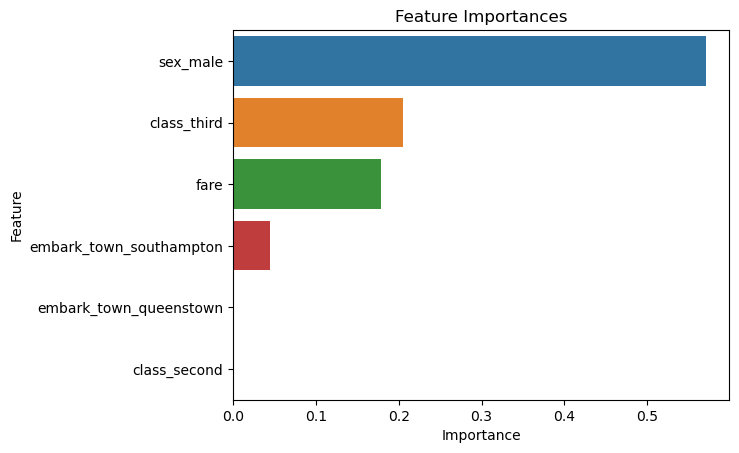

In [139]:
importances = clf.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})


# sort df by feature importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
# plot
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()

In [ ]:
clf = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)

# Fit DT classifier
clf.fit(X_train, y_train)

# Predict
y_pred_train = clf.predict(X_train)
y_pred_val = clf.predict(X_validate)

scores = []
output = {
    'features': features,
    'model': f'DT, max_depth={m}',
    'train_accuracy': metrics.accuracy_score(y_train, y_pred_train),
    'train_precision': metrics.precision_score(y_train, y_pred_train),
    'train_recall/TPR': metrics.recall_score(y_train, y_pred_train),
    'train_f1': metrics.f1_score(y_train, y_pred_train),
    'validate_accuracy':  metrics.accuracy_score(y_validate, y_pred_val),
    'validate_precision': metrics.precision_score(y_validate, y_pred_val),
    'validate_recall/TPR': metrics.recall_score(y_validate, y_pred_val),
    'validate_f1': metrics.f1_score(y_validate, y_pred_val),
}
scores.append(output)

pd.DataFrame(scores)